# Trial analysis from an simple excel

## Visualize the required format for the xlsx file

MNA requires at least a three columns, `x` (in screen coordinates), `y` (in screen coordinates) and `time` (in seconds)

In [1]:
import pandas as pd
pd.read_excel('../sample_data/1imageSubset.xlsx').head()

,pupil,time,trial,x,y
0,663,-91761,1,1608.6,2670.4
1,693,-91759,1,1567.6,2541.9
2,695,-91757,1,1529.2,2406.5
3,694,-91755,1,1488.5,2273.6
4,697,-91753,1,1454.7,2170.3


## Imports

In [2]:
from mna.sessions.eye_session import process_eye_trial_xlsx

## Analyze the xlsx file

This function processes a single trial worth of data, defined as the entire _.xlsx_ file presently. It simply reads the file, converts the coordinates to degrees, and runs the pre-configured *NSLR* algorithm to generate classes. The *NSLR* classifier is the best performing in most tests but you can also try *REMODNAV*. `screen_max_x` and `screen_max_y` are used to determine the center of the screen to referece coordinates.

In [3]:
eye_data, intervals_nan, eye_results_df, fig = process_eye_trial_xlsx(xlsx_filename = '../sample_data/1imageSubset.xlsx', classifiers = 'NSLR', plot_eye_result=True, screen_max_x=1280, screen_max_y=960, time_units='ms', start_timestamp=0)

## Results

### Classification result for each sample

*x_deg* and *y_deg* are the converted visual degrees of the x and y coordinate data respectively. *NSLR_Segment* is the number of event (segment) for that sample, and *NSLR_Class* is the class label.

In [4]:
print(f"intervals unable to be classified: {intervals_nan}")
eye_data.head()

intervals unable to be classified: []


,index,pupil,timestamp,trial,x,y,x_deg,y_deg,NSLR_Segment,NSLR_Class
0,288,644,0.001,1,1214.8,839.7,83.548240,79.756842,1.0,Fixation
1,289,646,0.003,1,1215.2,839.7,83.552689,79.756842,1.0,Fixation
2,290,645,0.005,1,1215.3,840.4,83.553800,79.776317,1.0,Fixation
3,291,647,0.007,1,1215.3,841.0,83.553800,79.792952,1.0,Fixation
4,292,648,0.009,1,1215.1,842.1,83.551577,79.823310,1.0,Fixation


### Aggregate summary of classes

For each class recognized, *count* is the total count in the trial, *first_onset* is the first occurance (in seconds) of the class in the trial, *mean_duration* is the average duration (in seconds) of the class across all occurances. *class_onsets* is an continuous iterable that can be used for sequencing the trial.

In [5]:
eye_results_df

,0
NSLR_count.Blink,5.0
NSLR_count.Fixation,9.0
NSLR_count.PSO,3.0
NSLR_count.Saccade,18.0
NSLR_count.Smooth Pursuit,7.0
NSLR_first_onset.Blink,2.465
NSLR_first_onset.Fixation,0.001
NSLR_first_onset.PSO,0.267
NSLR_first_onset.Saccade,0.239
NSLR_first_onset.Smooth Pursuit,0.677


### Visualization of segments

A simple figure showing the x and y visual angles in degrees (top and bottom respectively), colored by class for each recognized segment. It is a quick visualization of information contained in *eye_data*.

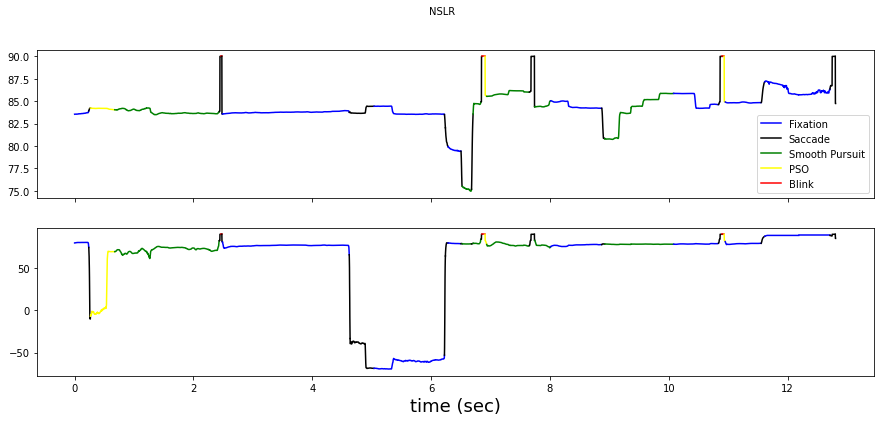

In [6]:
fig